In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Instantiate pandas dataframe
df = pd.read_excel(r"C:\Users\josep\ClassResources\CAPSTONE PROJECT\Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


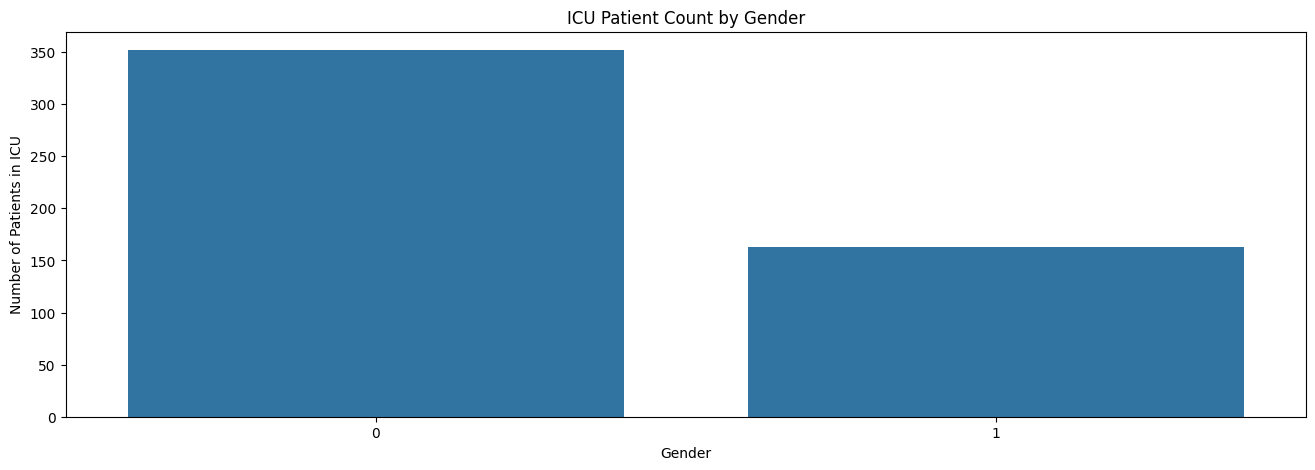

In [3]:
#Over half of the patients admitted to the ICU were part of gender group "0". 

ICU_patients = df[df['ICU'] == 1]

plt.figure(figsize=(16, 5))
sns.countplot(x='GENDER', data=ICU_patients)

plt.xlabel('Gender')
plt.ylabel('Number of Patients in ICU')
plt.title('ICU Patient Count by Gender')

plt.show()

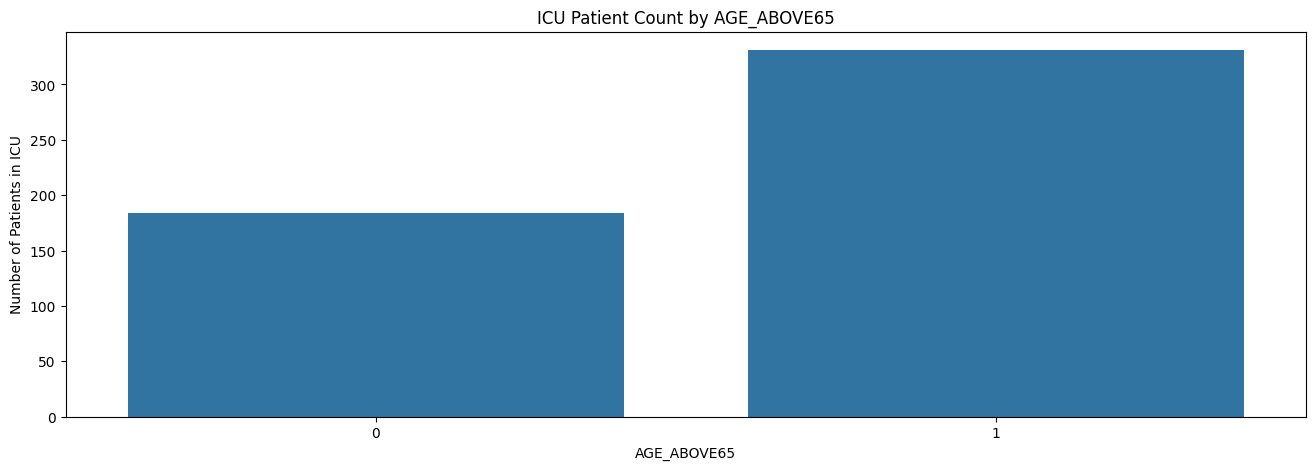

In [4]:
#Out of patients above the age of 65, around 60% of them were admitted to the ICU
ICU_patients = df[df['ICU'] == 1]

plt.figure(figsize=(16, 5))
sns.countplot(x='AGE_ABOVE65', data=ICU_patients)

plt.xlabel('AGE_ABOVE65')
plt.ylabel('Number of Patients in ICU')
plt.title('ICU Patient Count by AGE_ABOVE65')

plt.show()

In [5]:
df.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

In [6]:
#Change data types from object to numerical values for the ML model and so we can use KNNImputer on missing values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AGE_PERCENTIL'] = le.fit_transform(df['AGE_PERCENTIL'])
df['WINDOW'] = le.fit_transform(df['WINDOW'])

In [7]:
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,3,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1921,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
1922,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0
1923,384,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0


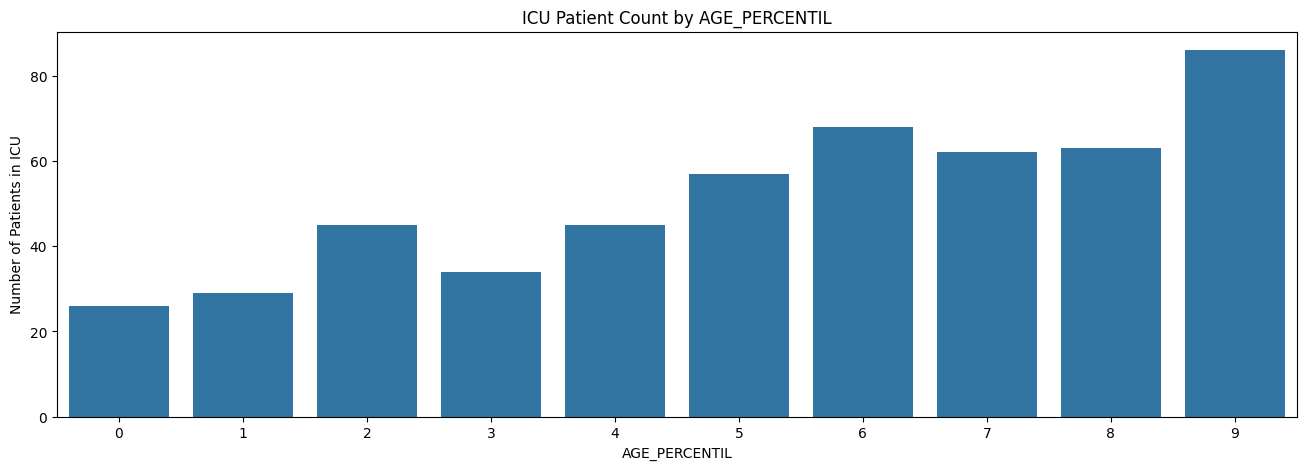

In [8]:
#The Risk of being admitted to the ICU increases with the age of the patients.
ICU_patients = df[df['ICU'] == 1]

plt.figure(figsize=(16, 5))
sns.countplot(x='AGE_PERCENTIL', data=ICU_patients)

plt.xlabel('AGE_PERCENTIL')
plt.ylabel('Number of Patients in ICU')
plt.title('ICU Patient Count by AGE_PERCENTIL')

plt.show()

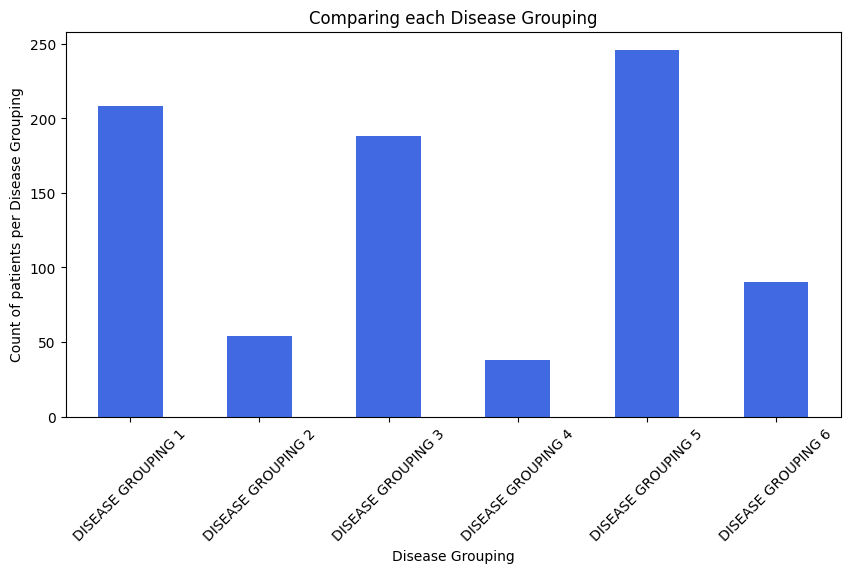

In [9]:
#Groups 1,3, and 5 have substantially more patients in them than 2,4, and 6. !,3 and 5 are comparable in sample size, with disease group 5 having the highest population of patients.
grouping_columns = [
    'DISEASE GROUPING 1',
    'DISEASE GROUPING 2',
    'DISEASE GROUPING 3',
    'DISEASE GROUPING 4',
    'DISEASE GROUPING 5',
    'DISEASE GROUPING 6'
]

counts = df[grouping_columns].sum()

plt.figure(figsize=(10, 5))
counts.plot(kind='bar', color='royalblue')
plt.xlabel('Disease Grouping')
plt.ylabel('Count of patients per Disease Grouping')
plt.title('Comparing each Disease Grouping')
plt.xticks(rotation=45)
plt.show()

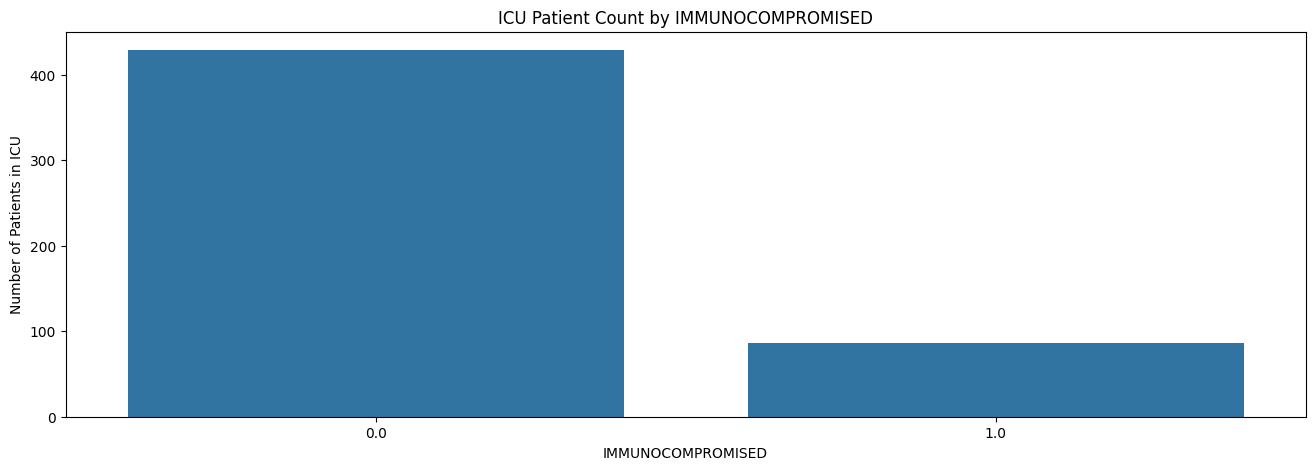

In [10]:
#20% of immunocompromised patients were admitted to the ICU.
#out of the total number of patients admitted to the ICU, 86 were confirmed as immunocompromised(17%). 429 were confirmed as not being immunocompromised(83%).

#304 out of 1926 total patients were confirmed to be immunocompromised.

#86 of 304 confirmed immunocomprimised patients were admitted to the ICU. Roughly 28% of immunocompromised were admitted to the ICU
#429 of 1616 non-immunocompromised patients were admitted to the ICU. Roughly 27% of immunocompromised we admitted to the ICU.

ICU_patients = df[df['ICU'] == 1]

plt.figure(figsize=(16, 5))
sns.countplot(x='IMMUNOCOMPROMISED', data=ICU_patients)

plt.xlabel('IMMUNOCOMPROMISED')
plt.ylabel('Number of Patients in ICU')
plt.title('ICU Patient Count by IMMUNOCOMPROMISED')

plt.show()

In [11]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

In [12]:
#replacing missing values using KNNImputer. By using this we can avoid and exponential loss of data be removing rows with missing information. 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("DataFrame after KNN imputation:")
df_imputed

DataFrame after KNN imputation:


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
2,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,2.0,0.0
3,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,3.0,0.0
4,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1921,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
1922,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0
1923,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0.0


In [13]:
df_imputed.isnull().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

In [14]:
df=df_imputed
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
2,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,2.0,0.0
3,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,3.0,0.0
4,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1921,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
1922,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0
1923,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0.0


In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1920    False
1921    False
1922    False
1923    False
1924    False
Length: 1925, dtype: bool

In [16]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,192.000000,0.467532,4.319481,0.368831,0.108052,0.028052,0.097662,0.019740,0.127792,0.046753,...,-0.798058,-0.904691,-0.816098,-0.756732,-0.840692,-0.766272,-0.798986,-0.904536,2.000000,0.267532
std,111.168431,0.499074,2.867348,0.482613,0.310527,0.165164,0.296935,0.139143,0.333945,0.211165,...,0.280426,0.252740,0.281625,0.363569,0.235203,0.379514,0.279223,0.253265,1.414581,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,96.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
50%,192.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.940476,-0.979798,-0.950311,-0.937181,-0.964580,-0.943755,-0.940146,-0.980026,2.000000,0.000000
75%,288.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.666667,-0.898990,-0.702951,-0.613423,-0.746918,-0.695341,-0.665743,-0.902167,3.000000,1.000000
max,384.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
2,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,2.0,0.0
3,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,3.0,0.0
4,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1921,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
1922,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0
1923,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0.0


In [18]:
#standardize data to remove outliers

#maintain categorical columns to be added back to df later.
temporarily_removed_columns_front =df.columns[:12]
temporarily_removed_columns_back =df.columns[229:]

#standardize measurement based columns
columns_to_standardize = df.columns[13:229]
columns_to_standardize

df_standardized = df.copy()

scaler = StandardScaler()

df_standardized[columns_to_standardize] = scaler.fit_transform(df_standardized[columns_to_standardize])
df_standardized[columns_to_standardize]


,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
0,-1.983402,-1.983402,-1.983402,-1.983402,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031
1,-1.983402,-1.983402,-1.983402,-1.983402,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031
2,0.348438,0.348438,0.348438,0.348438,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,1.074667,0.839235,-0.720313,-0.377203,0.430169,1.266971,0.958829,0.829326,-0.720090,-0.377031
3,-1.381637,-1.381637,-1.381637,-1.381637,0.0,0.379402,0.379402,0.379402,0.379402,0.0,...,1.074667,0.839235,-0.720313,-0.377203,0.430169,1.266971,0.958829,0.829326,-0.720090,-0.377031
4,-3.111711,-3.111711,-3.111711,-3.111711,0.0,0.947639,0.947639,0.947639,0.947639,0.0,...,2.823729,2.277752,1.997349,0.342372,1.513511,3.203226,2.595156,2.274674,1.994278,0.355857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.348438,0.348438,0.348438,0.348438,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031
1921,0.348438,0.348438,0.348438,0.348438,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031
1922,0.348438,0.348438,0.348438,0.348438,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031
1923,0.348438,0.348438,0.348438,0.348438,0.0,-0.188834,-0.188834,-0.188834,-0.188834,0.0,...,-0.674396,-0.599282,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031


In [19]:
all_columns = list(temporarily_removed_columns_front) + list(columns_to_standardize) + list(temporarily_removed_columns_back)
df_recombined = df_standardized[all_columns]
df_recombined

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,0.0,0.0
1,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,1.0,0.0
2,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.720313,-0.377203,0.430169,1.266971,0.958829,0.829326,-0.720090,-0.377031,2.0,0.0
3,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.720313,-0.377203,0.430169,1.266971,0.958829,0.829326,-0.720090,-0.377031,3.0,0.0
4,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.997349,0.342372,1.513511,3.203226,2.595156,2.274674,1.994278,0.355857,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,0.0,0.0
1921,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,1.0,0.0
1922,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,2.0,0.0
1923,384.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720313,-0.377203,-0.653172,-0.669285,-0.677498,-0.616023,-0.720090,-0.377031,3.0,0.0


In [20]:
x = df.drop(columns=['ICU'])
y = df['ICU']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training set:")
print(X_train)
print(y_train)
print("\nTesting set:")
print(X_test)
print(y_test)

Training set:
      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
1727                     345.0          1.0            9.0     1.0   
277                       55.0          0.0            4.0     0.0   
1778                     355.0          0.0            3.0     0.0   
358                       71.0          0.0            2.0     0.0   
1676                     335.0          1.0            7.0     1.0   
...                        ...          ...            ...     ...   
1130                     226.0          1.0            9.0     1.0   
1294                     258.0          0.0            1.0     0.0   
860                      172.0          1.0            5.0     1.0   
1459                     291.0          1.0            6.0     0.0   
1126                     225.0          0.0            1.0     1.0   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1727                 0.0                 0.0                 0.0   
277      

In [22]:
#Now that initial data cleaning and preprocessing has been doen, we can start training our machine learning models and scoring their accuracy.
RandForModel = RandomForestClassifier()
LogRegModel = LogisticRegression(max_iter=10000)

In [23]:
LogRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred = LogRegModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8598615916955017


In [25]:
RandForModel.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = RandForModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.870242214532872


In [27]:
#Dropping patient identifier to avoid over fitting based on individuals as apposed to individuals' categorical and metric data
df = df.drop(df.columns[0], axis=1)
df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
2,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,2.0,0.0
3,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,3.0,0.0
4,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1921,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
1922,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0
1923,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0.0


In [28]:
#dropping columns with repetitive data and "WINDOW" column as this is what's reccomended by KAGGLE when target variable is provided
correlation_matrix = df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1.0)]
df = df.drop(columns=to_drop)
df.columns

Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=122)

In [29]:
df

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
2,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,2.0,0.0
3,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-0.694983,-0.296221,-0.615231,-0.451613,-1.000000,-1.000000,3.0,0.0
4,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0
1921,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0.0
1922,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.0,0.0
1923,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.0,0.0


In [30]:
#Retrain models with the data after trimming and check new accuracy
x = df.drop(columns=['ICU'])
y = df['ICU']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Training set:")
print(X_train)
print(y_train)
print("\nTesting set:")
print(X_test)
print(y_test)

Training set:
      AGE_ABOVE65  AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  \
1727          1.0            9.0     1.0                 0.0   
277           0.0            4.0     0.0                 0.0   
1778          0.0            3.0     0.0                 0.0   
358           0.0            2.0     0.0                 0.0   
1676          1.0            7.0     1.0                 0.0   
...           ...            ...     ...                 ...   
1130          1.0            9.0     1.0                 0.0   
1294          0.0            1.0     0.0                 0.0   
860           1.0            5.0     1.0                 1.0   
1459          1.0            6.0     0.0                 0.0   
1126          0.0            1.0     1.0                 0.0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
1727                 0.0                 0.0                 0.0   
277                  0.0                 0.0                 0.0   
1778         

In [32]:
RandForModel = RandomForestClassifier()
LogRegModel = LogisticRegression(max_iter=10000)

In [33]:
LogRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
#Old accuracy was 0.8598615916955017. There was no change in accuracy for the logistic regression model.
y_pred = LogRegModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8598615916955017


In [35]:
RandForModel.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
#There was a small increase in accuracy for the random forest model.
y_pred = RandForModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8719723183391004


In [37]:
#Final Optimization.
param_grid = {
    'n_estimators': [700, 800, 1000],
    'max_depth': [10, 15, 20,],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search = GridSearchCV(estimator=RandForModel, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [700, 800, 1000]},
             verbose=2)

In [41]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 800}


In [42]:
best_model = grid_search.best_estimator_

In [43]:
y_pred = best_model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Final RandForest Model Accuracy: {accuracy:}')

Final RandForest Model Accuracy: 0.8788927335640139
